Epoch [5/100], Loss: 27.6351
Epoch [10/100], Loss: 11.2962
Epoch [15/100], Loss: 4.6770
Epoch [20/100], Loss: 1.9955
Epoch [25/100], Loss: 0.9092
Epoch [30/100], Loss: 0.4691
Epoch [35/100], Loss: 0.2908
Epoch [40/100], Loss: 0.2185
Epoch [45/100], Loss: 0.1893
Epoch [50/100], Loss: 0.1774
Epoch [55/100], Loss: 0.1726
Epoch [60/100], Loss: 0.1707
Epoch [65/100], Loss: 0.1699
Epoch [70/100], Loss: 0.1696
Epoch [75/100], Loss: 0.1694
Epoch [80/100], Loss: 0.1694
Epoch [85/100], Loss: 0.1694
Epoch [90/100], Loss: 0.1694
Epoch [95/100], Loss: 0.1694
Epoch [100/100], Loss: 0.1694


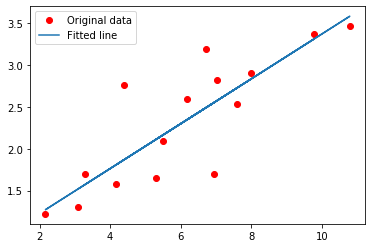

In [5]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 100
learning_rate = 0.001

# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

# Linear regression model
model = nn.Linear(input_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')